In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#getting to know some information about the dataset
data.shape

(768, 9)

In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#checking if there are any missing values in the dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As we can see above, there are no null values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
print(data.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


The above code line shows that in the whole dataset consisting of 768 records, 500 are non-diabetic while 268 are diabetic.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

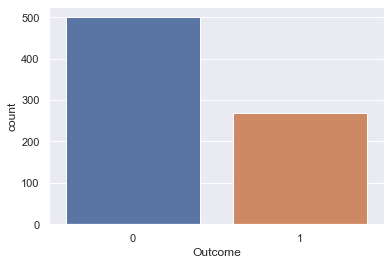

In [9]:
sns.countplot(x='Outcome', data=data)

In [10]:
KMeans_Clustering = KMeans(n_clusters=10, random_state=0) 
KMeans_Clustering.fit(data)
KMeans_Clustering.labels_

array([4, 0, 4, 3, 1, 7, 3, 9, 2, 7, 7, 4, 7, 5, 1, 9, 1, 7, 3, 3, 1, 7,
       4, 7, 6, 6, 4, 6, 6, 7, 7, 1, 3, 0, 7, 1, 7, 0, 0, 1, 4, 7, 7, 1,
       4, 4, 7, 0, 0, 9, 3, 3, 0, 8, 8, 0, 8, 6, 4, 6, 9, 7, 0, 6, 7, 0,
       7, 7, 3, 6, 3, 6, 7, 8, 0, 0, 0, 0, 9, 7, 7, 9, 3, 0, 7, 6, 0, 3,
       6, 7, 0, 1, 3, 7, 3, 1, 0, 3, 3, 1, 4, 4, 7, 3, 0, 6, 7, 6, 0, 3,
       6, 2, 3, 0, 1, 4, 7, 0, 0, 3, 6, 0, 3, 7, 7, 3, 6, 3, 6, 7, 1, 7,
       1, 0, 3, 6, 3, 3, 7, 8, 7, 7, 3, 7, 8, 0, 0, 6, 4, 0, 1, 7, 6, 2,
       4, 4, 3, 6, 3, 6, 4, 6, 8, 0, 7, 6, 4, 7, 7, 3, 7, 6, 9, 3, 3, 6,
       0, 6, 4, 7, 0, 3, 0, 0, 7, 4, 2, 3, 6, 6, 7, 6, 4, 9, 0, 1, 7, 3,
       3, 8, 7, 7, 7, 3, 1, 7, 8, 4, 3, 4, 0, 4, 4, 6, 1, 8, 6, 6, 0, 7,
       2, 4, 9, 1, 3, 0, 7, 4, 5, 3, 7, 8, 0, 7, 3, 4, 1, 4, 4, 7, 0, 3,
       7, 1, 1, 4, 7, 5, 8, 7, 7, 7, 3, 0, 1, 7, 0, 7, 8, 6, 6, 9, 0, 4,
       7, 3, 9, 7, 0, 9, 0, 3, 7, 3, 7, 3, 0, 6, 7, 8, 4, 6, 6, 4, 7, 6,
       2, 1, 3, 3, 3, 3, 1, 1, 4, 6, 8, 1, 1, 7, 9,

In [11]:
KMeans_labels = KMeans_Clustering.labels_
KMeans_labels

array([4, 0, 4, 3, 1, 7, 3, 9, 2, 7, 7, 4, 7, 5, 1, 9, 1, 7, 3, 3, 1, 7,
       4, 7, 6, 6, 4, 6, 6, 7, 7, 1, 3, 0, 7, 1, 7, 0, 0, 1, 4, 7, 7, 1,
       4, 4, 7, 0, 0, 9, 3, 3, 0, 8, 8, 0, 8, 6, 4, 6, 9, 7, 0, 6, 7, 0,
       7, 7, 3, 6, 3, 6, 7, 8, 0, 0, 0, 0, 9, 7, 7, 9, 3, 0, 7, 6, 0, 3,
       6, 7, 0, 1, 3, 7, 3, 1, 0, 3, 3, 1, 4, 4, 7, 3, 0, 6, 7, 6, 0, 3,
       6, 2, 3, 0, 1, 4, 7, 0, 0, 3, 6, 0, 3, 7, 7, 3, 6, 3, 6, 7, 1, 7,
       1, 0, 3, 6, 3, 3, 7, 8, 7, 7, 3, 7, 8, 0, 0, 6, 4, 0, 1, 7, 6, 2,
       4, 4, 3, 6, 3, 6, 4, 6, 8, 0, 7, 6, 4, 7, 7, 3, 7, 6, 9, 3, 3, 6,
       0, 6, 4, 7, 0, 3, 0, 0, 7, 4, 2, 3, 6, 6, 7, 6, 4, 9, 0, 1, 7, 3,
       3, 8, 7, 7, 7, 3, 1, 7, 8, 4, 3, 4, 0, 4, 4, 6, 1, 8, 6, 6, 0, 7,
       2, 4, 9, 1, 3, 0, 7, 4, 5, 3, 7, 8, 0, 7, 3, 4, 1, 4, 4, 7, 0, 3,
       7, 1, 1, 4, 7, 5, 8, 7, 7, 7, 3, 0, 1, 7, 0, 7, 8, 6, 6, 9, 0, 4,
       7, 3, 9, 7, 0, 9, 0, 3, 7, 3, 7, 3, 0, 6, 7, 8, 4, 6, 6, 4, 7, 6,
       2, 1, 3, 3, 3, 3, 1, 1, 4, 6, 8, 1, 1, 7, 9,

In [12]:
from collections import Counter

In [13]:
print(list(zip(Counter(KMeans_labels).keys(), Counter(KMeans_labels).values())))

[(4, 80), (0, 109), (3, 135), (1, 81), (7, 164), (9, 36), (2, 16), (5, 3), (6, 107), (8, 37)]


Now, I have to segregate each cluster on the basis of their outcome values.
Then I have to delete from each cluster the records in minority in terms of the outcome values.

In [14]:
KMeans_labels.shape

(768,)

In [15]:
KMeans_Clusters = []
Cluster_Row = []

for i in range(0, 10):
    for j in range(0, 768):
        if(KMeans_labels[j]==i) :
            Cluster_Row.append(j)
    KMeans_Clusters.append(Cluster_Row)
    Cluster_Row = []

KMeans_Clusters

[[1,
  33,
  37,
  38,
  47,
  48,
  52,
  55,
  62,
  65,
  74,
  75,
  76,
  77,
  83,
  86,
  90,
  96,
  104,
  108,
  113,
  117,
  118,
  121,
  133,
  145,
  146,
  149,
  163,
  176,
  180,
  182,
  183,
  194,
  210,
  218,
  225,
  232,
  240,
  253,
  256,
  262,
  268,
  270,
  276,
  310,
  342,
  349,
  350,
  352,
  354,
  367,
  381,
  398,
  400,
  403,
  407,
  410,
  416,
  418,
  434,
  438,
  461,
  463,
  466,
  488,
  491,
  492,
  501,
  502,
  504,
  505,
  510,
  512,
  513,
  518,
  525,
  537,
  542,
  556,
  558,
  559,
  564,
  566,
  570,
  581,
  585,
  596,
  613,
  617,
  621,
  629,
  634,
  649,
  671,
  677,
  687,
  694,
  705,
  717,
  719,
  720,
  729,
  735,
  737,
  752,
  760,
  762,
  767],
 [4,
  14,
  16,
  20,
  31,
  35,
  39,
  43,
  91,
  95,
  99,
  114,
  130,
  132,
  150,
  195,
  204,
  214,
  223,
  236,
  243,
  244,
  254,
  287,
  292,
  293,
  297,
  298,
  308,
  309,
  320,
  325,
  338,
  356,
  382,
  390,
  405,
  411,
 

In the code-line just above, I got all the indices of records present in a particular cluster. Now, I need to segregate the diabetic and non-diabetic outcome out of it.

In [16]:
diabetic = 0
non_diabetic = 0

df = data

for i in range(10) :
    (diabetic, non_diabetic) = (0, 0)
    for j in KMeans_Clusters[i] :
        if(data.iloc[j]['Outcome']==0.0) :
            non_diabetic = non_diabetic + 1
        else :
            diabetic = diabetic + 1
    print(i, "\t", non_diabetic, "\t", diabetic)
    
    #deleting lesser value
    if(diabetic < non_diabetic) :
        for j in KMeans_Clusters[i] :
            if(data.iloc[j]['Outcome']==1.0) :
                df = df.drop(j)
    else :
        for j in KMeans_Clusters[i] :
            if(data.iloc[j]['Outcome']==0.0) :
                df = df.drop(j)

df.shape

0 	 97 	 12
1 	 39 	 42
2 	 5 	 11
3 	 122 	 13
4 	 25 	 55
5 	 2 	 1
6 	 63 	 44
7 	 107 	 57
8 	 20 	 17
9 	 20 	 16


(539, 9)

Got my dataframe for performing SVM which is named here as 'df'

STARTING THE PREDICTION PROCESS BY USING SVM

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import pickle

In [18]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [19]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [20]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
761    1
762    0
764    0
765    0
767    0
Name: Outcome, Length: 539, dtype: int64


DATA STANDARDISATION

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X)

StandardScaler()

In [23]:
standardized_data = scaler.transform(X)

In [24]:
print(standardized_data)

[[ 0.75261109  1.00100946  0.15777171 ...  0.30712838  0.4937673
   1.52742974]
 [-0.80401738 -0.97224482 -0.17397972 ... -0.57354905 -0.31911849
  -0.09961498]
 [ 1.37526248  2.09726184 -0.28456353 ... -0.98872555  0.62630303
  -0.01398105]
 ...
 [-0.49269168  0.18665055  0.0471879  ...  0.70972377 -0.35151611
  -0.44215071]
 [ 0.4412854   0.15532905  0.15777171 ... -0.62387348 -0.63131376
  -0.18524892]
 [-0.80401738 -0.72167285  0.0471879  ... -0.09546702 -0.42514707
  -0.78468645]]


In [25]:
X = standardized_data
Y = df['Outcome']

TRAIN - TEST SPLIT

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify=Y, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(539, 8) (485, 8) (54, 8)


TRAINING THE MODEL

In [28]:
classifier = svm.SVC(kernel='linear')

In [29]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

MODEL EVALUATION

Accuracy Score

In [30]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9257731958762887


In [32]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9259259259259259


PERFORMING 10-FOLD CROSS VALIDATION 

In [34]:
# evaluating the above hybrid model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# # create dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# # prepare the cross-validation procedure
# cv = KFold(n_splits=10, random_state=1, shuffle=True)
# # create model
# model = LogisticRegression()
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [35]:
# prepare the cross-validation procedure
cross_validation = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(classifier, X, Y, scoring='accuracy', cv=cross_validation, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.924 (0.032)


SAVING THE MODEL TO DISK

In [36]:
# save the model to disk
filename = 'hybrid_diabetes_detector.sav'
pickle.dump(classifier, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)

MAKING A PREDICTIVE SYSTEM

In [37]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.4412854   1.5647964   0.15777171 -0.06250347  0.945035   -0.6741979
   0.37595776  1.61306367]]
[1]
The person is diabetic
